In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

zerg_data = read_csv('../Output/ZergMarch.csv', header=0, index_col=False)
display(zerg_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),12,12.0,14,50,0,0,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,266.0,480,30,Player 1 - soO (Zerg),13,14.0,14,55,755,150,1100,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,210.0,960,60,Player 1 - soO (Zerg),14,16.0,22,240,839,100,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,176.4,1440,90,Player 1 - soO (Zerg),16,18.0,22,90,867,450,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,179.2,1920,120,Player 1 - soO (Zerg),16,18.0,22,95,923,775,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81277,2481,Eternal Empire LE,eu,1610,Z,T,284.2,33600,2100,Player 1 - Reynor (Zerg),68,186.0,204,1354,2855,1000,16150,5850,41656,1377,403,350,3650,2950,8181,0,1,0,0,0,68,0,2,0,7,6,2,38,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,71,1
81278,2481,Eternal Empire LE,eu,1610,Z,T,295.4,34080,2130,Player 1 - Reynor (Zerg),68,187.5,204,1509,2911,700,16575,6275,42431,1363,380,150,3900,3200,8281,0,1,0,0,0,68,0,2,0,7,6,2,43,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,68,1
81279,2481,Eternal Empire LE,eu,1610,Z,T,379.4,34560,2160,Player 1 - Reynor (Zerg),68,191.5,204,1314,2743,500,16975,6775,43131,1503,425,0,3900,3200,8431,0,1,0,0,0,68,0,2,0,7,6,2,45,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,3,80,1
81280,2481,Eternal Empire LE,eu,1610,Z,T,238.0,35040,2190,Player 1 - Reynor (Zerg),67,180.0,204,1979,2659,300,16700,6650,44156,1539,380,50,3600,2900,8781,0,1,0,0,0,67,0,2,0,7,6,2,45,1,1,0,0,0,0,0,0,26,4,0,0,1,0,1,9,0,0,0,2,79,1


In [2]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(zerg_data) if x not in no_standardize]

#Standardizing these columns
stand = zerg_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(zerg_data['win'])

#Displaying first and last 5 rows
display(zerg_data_standardized.head(5), zerg_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.008206,-1.356400,-1.221726,-1.229923,-0.472139,-2.051780,-1.571400,-1.165184,-0.916618,-0.507356,-0.526164,-1.040536,-0.619344,-0.632129,-0.59287,-0.393925,-0.338684,-0.809509,-0.094892,-0.162689,-0.122402,-1.387136,-0.079387,-0.870208,0.0,-1.144992,-1.376606,-0.609915,-0.317422,-0.443652,-0.555201,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,-1.149560,-1.199914,-0.517449,-0.851235,-2.744417,-0.306361,-0.47398,-0.451652,-0.128444,-0.119025,-0.192496,-0.235959,-0.683233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.813557,-1.314004,-1.189666,-1.229923,-0.466428,-1.173071,-1.228678,-1.156267,-0.916618,-0.507356,-0.526164,-1.040536,-0.619344,-0.632129,-0.59287,-0.393925,-0.338684,-0.809509,-0.094892,-0.162689,-0.122402,-1.345125,-0.079387,-0.870208,0.0,-1.144992,-1.376606,-0.609915,-0.317422,-0.443652,-0.555201,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,-1.149560,-1.199914,-0.517449,-0.851235,-2.744417,-0.306361,-0.47398,-0.451652,-0.128444,-0.119025,-0.192496,-0.235959,-0.683233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,0.219502,-1.271609,-1.157606,-1.121086,-0.255122,-1.075308,-1.342919,-1.129516,-0.916618,-0.507356,-0.526164,-1.040536,-0.619344,-0.632129,-0.59287,-0.393925,-0.338684,-0.809509,-0.094892,-0.162689,-0.122402,-1.303114,-0.079387,-0.870208,0.0,-1.144992,-1.376606,-0.609915,-0.317422,-0.443652,-0.555201,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,-1.039454,-1.199914,-0.517449,-0.851235,-2.744417,-0.306361,-0.47398,-0.451652,-0.128444,-0.119025,-0.192496,-0.235959,-0.683233,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,-0.136932,-1.186818,-1.125546,-1.121086,-0.426451,-1.042720,-0.543235,-1.111682,-0.916618,-0.507356,-0.526164,-1.040536,-0.619344,-0.632129,-0.59287,-0.393925,-0.338684,-0.809509,-0.094892,-0.162689,-0.122402,-1.177080,-0.079387,-0.870208,0.0,-1.144992,-0.755801,-0.609915,-0.317422,-0.443652,-0.555201,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,-1.039454,-1.199914,-0.

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,baneling,banelingnest,broodling,broodlingescort,changeling,drone,creeptumor,evolutionchamber,disruptor,extractor,hatchery,hive,hydralisk,hydraliskden,infestationpit,infestor,lair,locust,mutalisk,nydusnetwork,nydusworm,overlord,queen,roach,roachwarren,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,Map_Acropolis LE,Map_Aura de mort EC,Map_Automaton LE,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
81277,1.006625,1.017739,1.567489,1.354975,1.017286,1.271020,0.713411,1.527715,1.763047,5.371582,1.669531,-0.205615,0.793310,1.644703,1.590175,2.906210,-0.338684,1.232908,-0.094892,-0.162689,-0.122402,0.965488,-0.079387,1.274754,0.0,0.925081,1.727419,1.74682,3.874751,2.196048,1.712073,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,1.603095,0.397691,-0.517449,-0.851235,0.352339,-0.306361,1.874451,1.497544,-0.128444,-0.119025,-0.192496,2.988521,2.960945,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
81278,1.125436,1.017739,1.591534,1.354975,1.194326,1.336196,0.027968,1.603508,1.957723,5.480958,1.647208,-0.253266,-0.013921,1.800650,1.775178,2.946549,-0.338684,1.232908,-0.094892,-0.162689,-0.122402,0.965488,-0.079387,1.274754,0.0,0.925081,1.727419,1.74682,4.426353,2.196048,1.712073,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,1.603095,0.397691,-0.517449,-0.851235,0.352339,-0.306361,1.874451,1.497544,-0.128444,-0.119025,-0.192496,2.988521,2.806966,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
81279,2.016520,1.017739,1.655654,1.354975,0.971598,1.140669,-0.428994,1.674843,2.186754,5.579749,1.870445,-0.160037,-0.619344,1.800650,1.775178,3.007058,-0.338684,1.232908,-0.094892,-0.162689,-0.122402,0.965488,-0.079387,1.274754,0.0,0.925081,1.727419,1.74682,4.646994,2.196048,1.712073,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,1.603095,0.397691,-0.517449,-0.851235,0.352339,-0.306361,1.874451,1.497544,-0.128444,-0.119025,-0.192496,2.988521,3.422884,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
81280,0.516529,0.975343,1.471310,1.354975,1.731159,1.042905,-0.885957,1.625800,2.129497,5.724408,1.927848,-0.253266,-0.417537,1.613513,1.553174,3.148245,-0.338684,1.232908,-0.094892,-0.162689,-0.122402,0.923476,-0.079387,1.274754,0.0,0.925081,1.727419,1.74682,4.646994,2.196048,1.712073,-0.153493,-0.530485,-0.067931,-0.269186,-0.248548,-0.161696,1.603095,0.397691,-0.517449,-0.851235,0.352339,-0.306361,1.874451,1.497544,-0.128444,-0.119025,-0.192496,1.913694,

In [5]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y = zerg_data_standardized['win']
X_standardized = zerg_data_standardized[yes_X]

In [6]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [7]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [8]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [9]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(52020, 1)
(13005, 1)
(16257, 1)


In [10]:
print(X_standardized_train.shape)
print(X_standardized_val.shape)
print(X_standardized_test.shape)

(52020, 115)
(13005, 115)
(16257, 115)


In [11]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_standardized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_standardized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_standardized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [12]:
val_performance = {}
performance = {}

In [14]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=19, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dropout(0.8))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.7384 - binary_accuracy: 0.5089 - precision_1: 0.5167 - recall_1: 0.5098 - auc: 0.5128 - val_loss: 0.6944 - val_binary_accuracy: 0.4942 - val_precision_1: 0.4660 - val_recall_1: 0.7757 - val_auc: 0.5446cy: 0.5017 - precision_1: 0.4801 - recall_1: 0.4205 - auc - ETA: 2s - loss: 0.7491 - binary_accuracy: 0.5098 - precision_1: 0.5203 - reca - ETA: 1s - loss: 0.7460 - binary_accuracy: 0.5085 - precision_1: 0.516 - ETA: 0s - loss: 0.7423 - binary_accuracy: 0.5080 - precision_1: 0.513
Epoch 2/100
1626/1626 [==============================] - 14s 8ms/step - loss: 0.6926 - binary_accuracy: 0.5213 - precision_1: 0.5256 - recall_1: 0.5878 - auc: 0.5333 - val_loss: 0.6947 - val_binary_accuracy: 0.4977 - val_precision_1: 0.4687 - val_recall_1: 0.7908 - val_auc: 0.54495144 - precision_1: 0.5078 - recall_1: 0.5262 - auc - E - ETA: 3s - loss: 0.6927 - binary_accuracy: 0.5237 - precision_1: 0.5309 - reca - ETA
Epoch 3/100
16

1626/1626 [==============================] - 14s 8ms/step - loss: 0.6708 - binary_accuracy: 0.5713 - precision_1: 0.5760 - recall_1: 0.5897 - auc: 0.6131 - val_loss: 0.6906 - val_binary_accuracy: 0.5461 - val_precision_1: 0.5004 - val_recall_1: 0.5909 - val_auc: 0.5681cision_1: 0.5540 - recall_1: 0.5556 - - ETA: 8s - loss: 0.6725 - binary_accuracy: 0.5756 - precision_1: 0.5671  - ETA: 8s - loss: 0.6672 - binary_accuracy: 0.5818 - precision_ - ETA: 6s - loss: 0.6698 - binary_accuracy: 0.5783 - precision_1: 0.5611 - recall_1: 0.58 - ETA: 6s - loss: 0.6694 - binary_accuracy: 0.5771 - precision_1: 0.5659 - recall_1: 0.5794 - auc:  - ETA: 6s - loss: 0.6686 - binary_accuracy: 0.5778 - precision_ - ETA: 5s - loss: 0.6716 - binary_accuracy: 0.5720 - precision_1: 0.559 - ETA: 4s - loss: 0.6694 - binary_accuracy: 0.5764 -  - ETA: 2s - loss: 0.6682 - binary_accuracy: 0.5774 - precision_1: 0 - ETA: 1s - loss: 0.6695 - binary_accuracy: 0.5744 - precision_1: 0.576 - ETA: 0s - loss: 0.6704 - binary_a

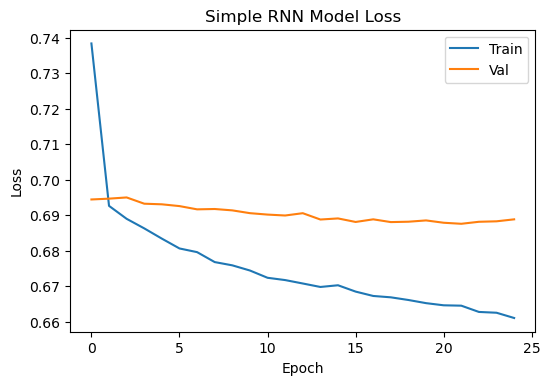

In [15]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [18]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6917 - binary_accuracy: 0.5219 - precision_4: 0.5271 - recall_4: 0.5689 - auc_3: 0.5345 - val_loss: 0.6982 - val_binary_accuracy: 0.5287 - val_precision_4: 0.4802 - val_recall_4: 0.4528 - val_auc_3: 0.5280ccuracy: 0.5204 - precision_4: 0.520
Epoch 2/100
1626/1626 [==============================] - 14s 8ms/step - loss: 0.6805 - binary_accuracy: 0.5528 - precision_4: 0.5972 - recall_4: 0.3667 - auc_3: 0.5604 - val_loss: 0.7019 - val_binary_accuracy: 0.5333 - val_precision_4: 0.4843 - val_recall_4: 0.4213 - val_auc_3: 0.5300583 - precision_4: 0.5525 - recall_4: 0.3937 - auc_3:  - ETA: 9s - loss: 0.6860 - binary_a - ETA: 7s - loss: 0.6844 - binary_accuracy: 0.5537 - precision_4: 0.5 - ETA: 6s - loss: 0.6819 - binary_accuracy: 0.5563 - pr - ETA: 4s - loss: 0.6850 - binary_accuracy: 0.5487 - precision_4: 0.5653 - recall_4: 0.3410 - auc_3:  - ETA: 4s - loss: 0.6843 - binary_accuracy: 0.5505 - pr - ETA: 3s - loss: 

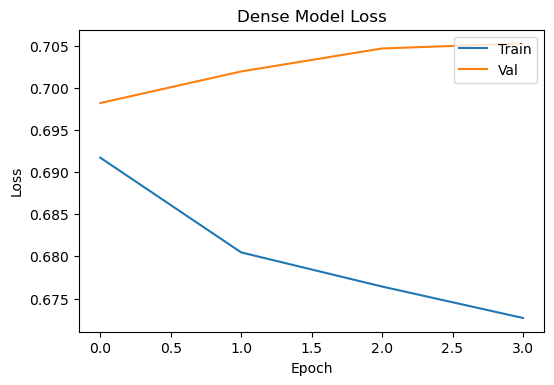

In [19]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [20]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.5))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 15s 9ms/step - loss: 0.6884 - binary_accuracy: 0.5367 - precision_5: 0.5480 - recall_5: 0.4994 - auc_4: 0.5553 - val_loss: 0.6941 - val_binary_accuracy: 0.5354 - val_precision_5: 0.4920 - val_recall_5: 0.7006 - val_auc_4: 0.5670loss: 0.6886 - binary_accuracy: 0.5370 - precision_5: 0.5461 - recall_5: 0.4997
Epoch 2/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6726 - binary_accuracy: 0.5743 - precision_5: 0.5866 - recall_5: 0.5476 - auc_4: 0.6101 - val_loss: 0.6958 - val_binary_accuracy: 0.5404 - val_precision_5: 0.4960 - val_recall_5: 0.7190 - val_auc_4: 0.5728 5s - loss: 0.6726 - binary_accuracy: 0.5792 - precision_5: 0.5686 - recall_5: 0.5265 - auc_4: 0. - ETA: 5s - loss: 0.6728 - binary_accuracy: - ETA: 1s - loss: 0.6718 - binary_accuracy: 0.5770 - precision_5: 0.5807 - recall_5: 0.5646 - auc_4:  - ETA: 0s - loss: 0.6723 - binary_accuracy: 0.5759 - precision_5: 0.5820 - recall_5: 0.5594 - auc_4: 0. - 

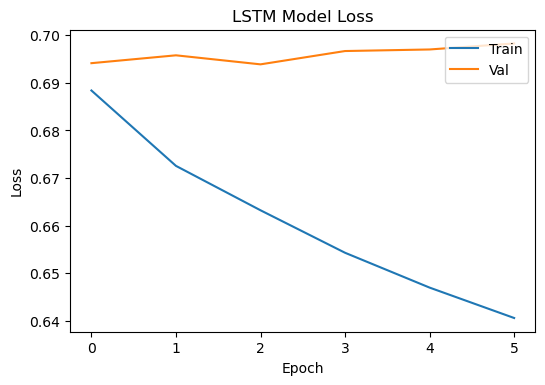

In [21]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [22]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1626/1626 [==============================] - 15s 9ms/step - loss: 0.6891 - binary_accuracy: 0.5400 - precision_6: 0.5493 - recall_6: 0.5235 - auc_5: 0.5633 - val_loss: 0.6961 - val_binary_accuracy: 0.5315 - val_precision_6: 0.4906 - val_recall_6: 0.8145 - val_auc_5: 0.5755
Epoch 2/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6699 - binary_accuracy: 0.5754 - precision_6: 0.5833 - recall_6: 0.5736 - auc_5: 0.6157 - val_loss: 0.6965 - val_binary_accuracy: 0.5336 - val_precision_6: 0.4919 - val_recall_6: 0.8020 - val_auc_5: 0.5802
Epoch 3/100
1626/1626 [==============================] - 14s 9ms/step - loss: 0.6615 - binary_accuracy: 0.5913 - precision_6: 0.5991 - recall_6: 0.5895 - auc_5: 0.6350 - val_loss: 0.6968 - val_binary_accuracy: 0.5328 - val_precision_6: 0.4912 - val_recall_6: 0.7852 - val_auc_5: 0.5829
Epoch 4/100
407/407 [==============================] - 3s 7ms/step - loss: 0.6990 - binary_accuracy: 0.5384 - precision_6: 0.4949 - recall_6: 

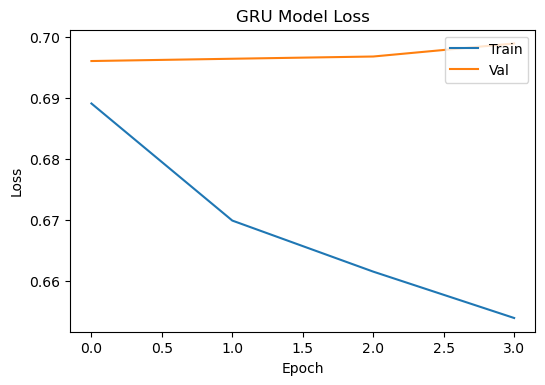

In [23]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

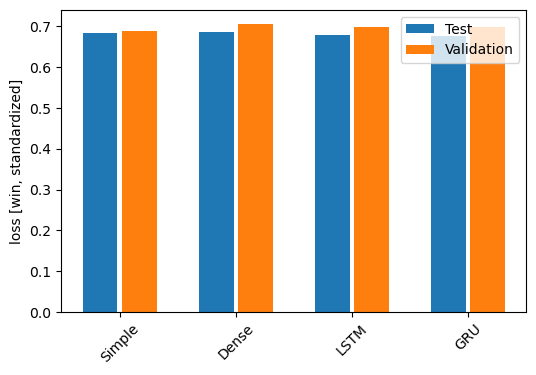

In [24]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

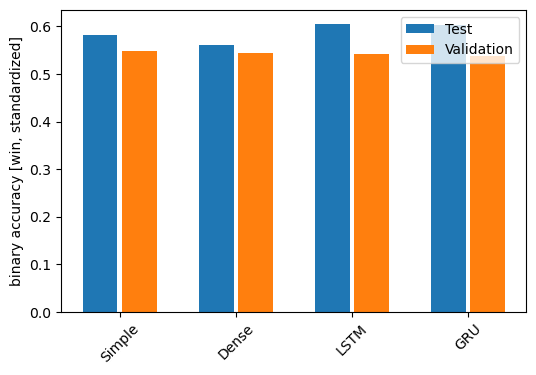

In [25]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, standardized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()